In [100]:
import sys
print(sys.executable)


/home/lowagie/P6 /.venv/bin/python


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("OK")


OK


PHASE 1 — IMPORT & INSPECTION RAPIDE

📌 1. Chargement du dataset

In [102]:
data_path = "Data/2016_Building_Energy_Benchmarking.csv"

df = pd.read_csv(data_path)

print("Shape du dataset :", df.shape)
df.head()


Shape du dataset : (3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


📌 2. Nombre de lignes / colonnes

In [103]:
n_rows, n_cols = df.shape
print(f"Nombre de lignes : {n_rows}")
print(f"Nombre de colonnes : {n_cols}")


Nombre de lignes : 3376
Nombre de colonnes : 46


📌 3. Types de variables

In [104]:
df.dtypes


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

📌 4. Informations générales

In [105]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

📌 5. Valeurs manquantes

In [106]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
Electricity(kWh)                      9
SourceEUIWN(kBtu/sf)                  9
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
NaturalGas(therms)                    9
SteamUse(kBtu)                        9
NaturalGas(kBtu)                      9
SourceEUI(kBtu/sf)                    9
Electricity(kBtu)                     9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEnergyUseWN(kBtu)                 6
SiteEUIWN(kBtu/sf)                    6


📌 6. Doublons

In [107]:
duplicates = df.duplicated().sum()
print("Nombre de doublons :", duplicates)


Nombre de doublons : 0


📌 7. Aperçu statistique

In [108]:
df.describe(include="all")


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,309 South Cloverdale Street,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


###  Choix de la variable cible : `SiteEUI(kBtu/sf)`

C'est l'intensité énergétique normalisée par la surface.  

Motivations :
- mesure standard dans l'industrie du bâtiment
- valeurs plus stabiles que `SourceEUI`
- disponible pour la majorité des bâtiments

Nous utilisons donc `SiteEUI(kBtu/sf)` comme variable cible pour tout le projet.


📌 Fixer la cible dans le notebook

In [109]:
target_col = "SiteEUI(kBtu/sf)"
df[target_col].describe()


count    3369.000000
mean       54.732116
std        56.273124
min         0.000000
25%        27.900000
50%        38.599998
75%        60.400002
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

📌 Vérifier les types de bâtiments disponibles

In [110]:
df["BuildingType"].value_counts()


BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

📌 Filtrer les bâtiments pertinents (pas de résidentiel)

In [111]:
initial_count = len(df)

types_pertinents = [
    "NonResidential",
    "Nonresidential COS",
    "Campus"
]

df = df[df["BuildingType"].isin(types_pertinents)].copy()

print(f"Filtrage bâtiments pertinents : {initial_count} → {len(df)} lignes")


Filtrage bâtiments pertinents : 3376 → 1569 lignes


PHASE 2 — ANALYSE EXPLORATOIRE (EDA)

2.1 — Aperçu général de la distribution des variables clés

Distribution de la cible : SiteEUI(kBtu/sf)

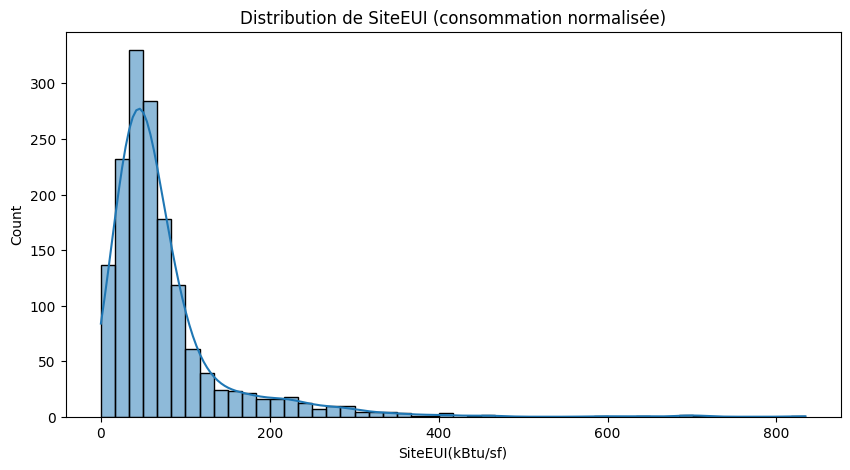

In [112]:
plt.figure(figsize=(10,5))
sns.histplot(df["SiteEUI(kBtu/sf)"], bins=50, kde=True)
plt.title("Distribution de SiteEUI (consommation normalisée)")
plt.show()


Distribution de la surface totale : PropertyGFATotal

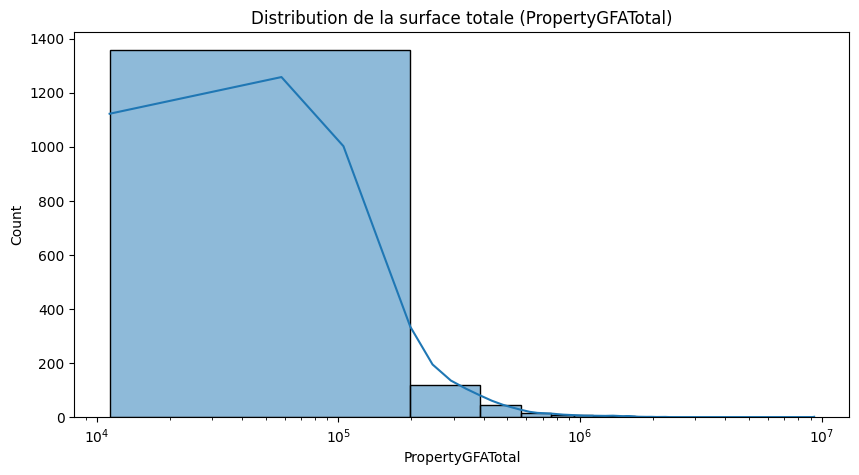

In [113]:
plt.figure(figsize=(10,5))
sns.histplot(df["PropertyGFATotal"], bins=50, kde=True)
plt.title("Distribution de la surface totale (PropertyGFATotal)")
plt.xscale("log")  
plt.show()


Distribution de l’année de construction

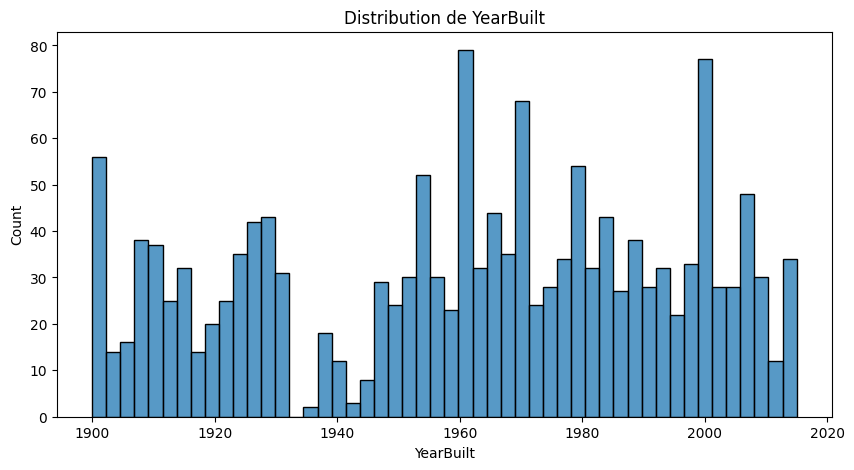

In [114]:
plt.figure(figsize=(10,5))
sns.histplot(df["YearBuilt"], bins=50, kde=False)
plt.title("Distribution de YearBuilt")
plt.show()


📌 2.2 — Analyse des valeurs aberrantes (outliers)

Boxplot de la cible

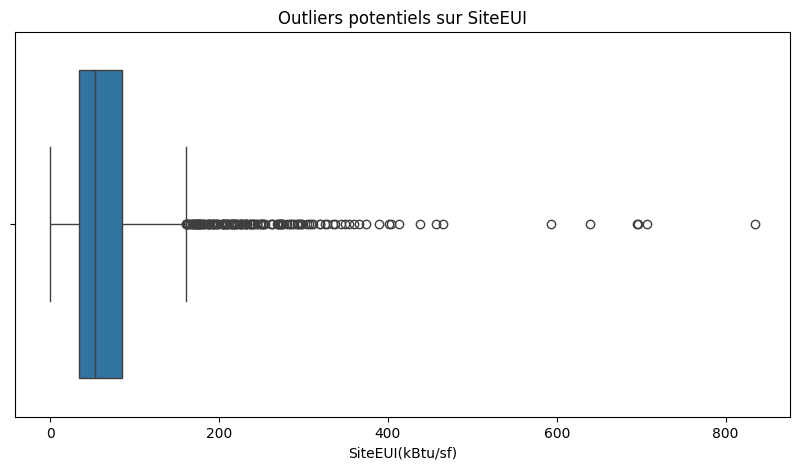

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["SiteEUI(kBtu/sf)"])
plt.title("Outliers potentiels sur SiteEUI")
plt.show()


Boxplot des surfaces

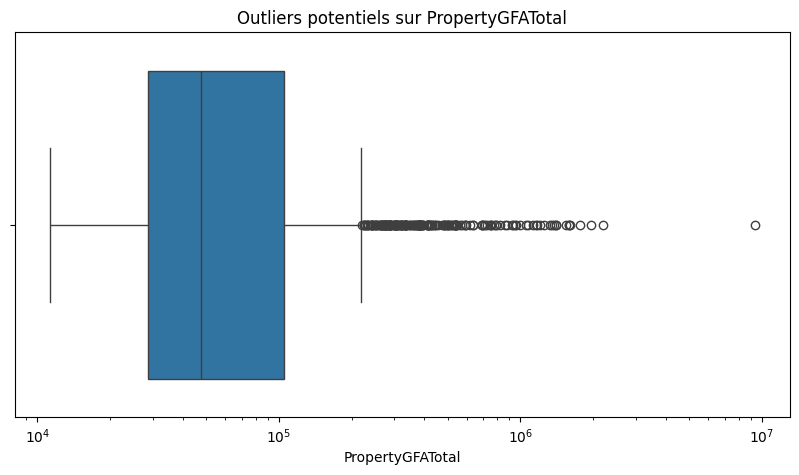

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["PropertyGFATotal"])
plt.xscale("log")
plt.title("Outliers potentiels sur PropertyGFATotal")
plt.show()


📌 2.3 — Relations entre variables (quanti vs quanti)


 Surface vs consommation normalisée

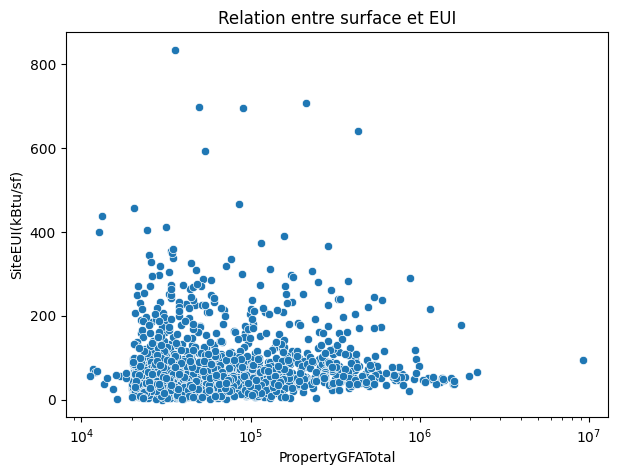

In [117]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["PropertyGFATotal"], y=df["SiteEUI(kBtu/sf)"])
plt.xscale("log")
plt.title("Relation entre surface et EUI")
plt.show()


Corrélations numériques (heatmap)

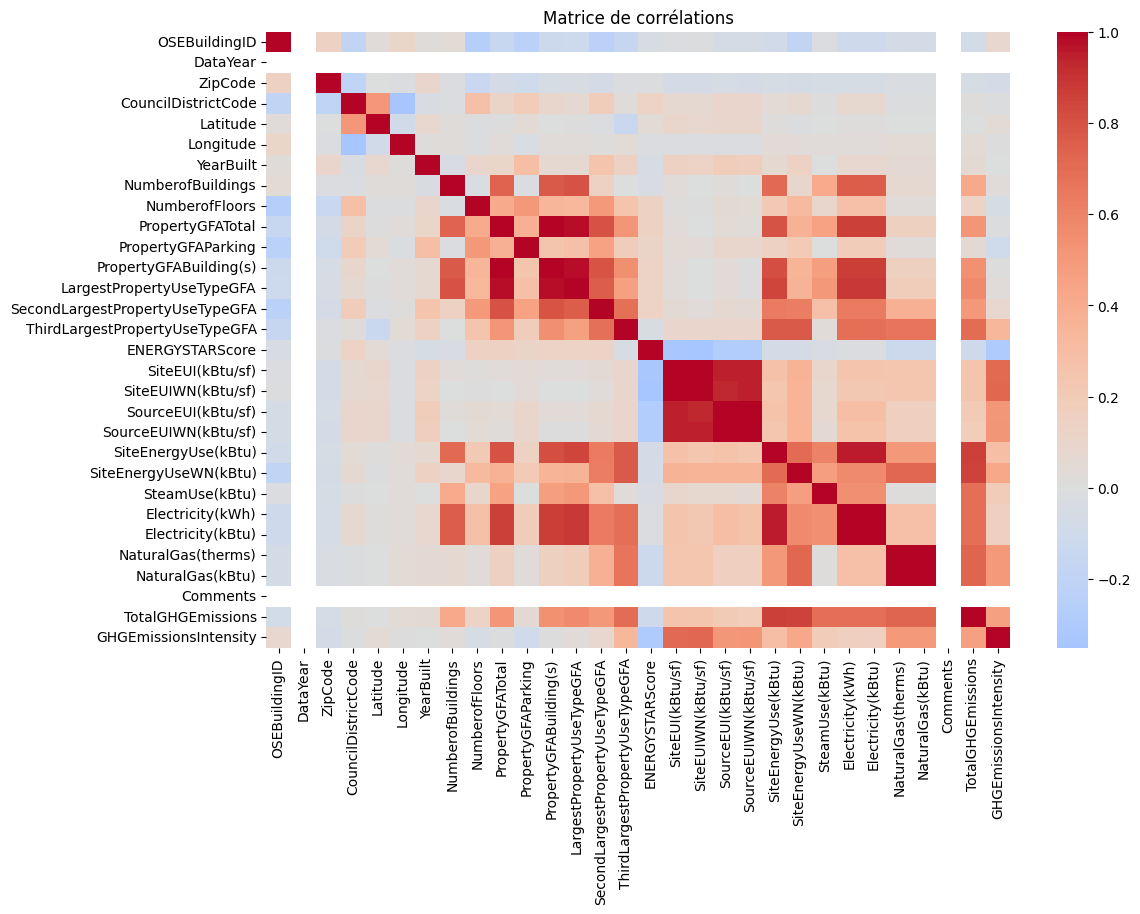

In [118]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélations")
plt.show()


2.4 — Relations quali vs quanti

EUI selon le type de propriété

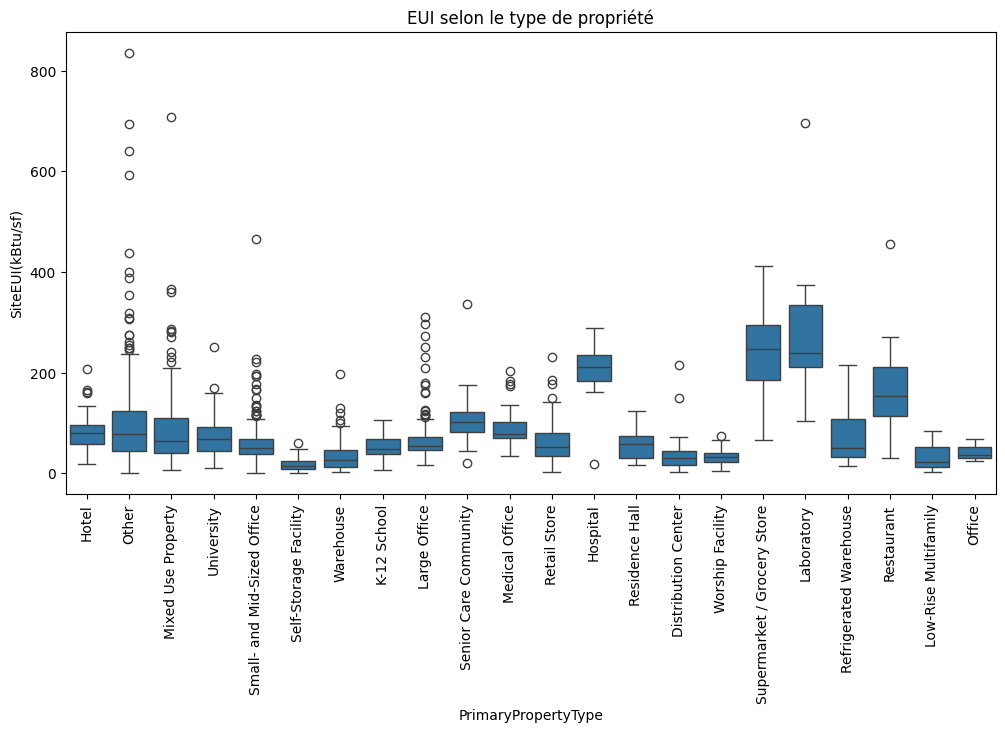

In [119]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="PrimaryPropertyType", y="SiteEUI(kBtu/sf)")
plt.xticks(rotation=90)
plt.title("EUI selon le type de propriété")
plt.show()


2.5 — Analyse des valeurs manquantes (visualisation)

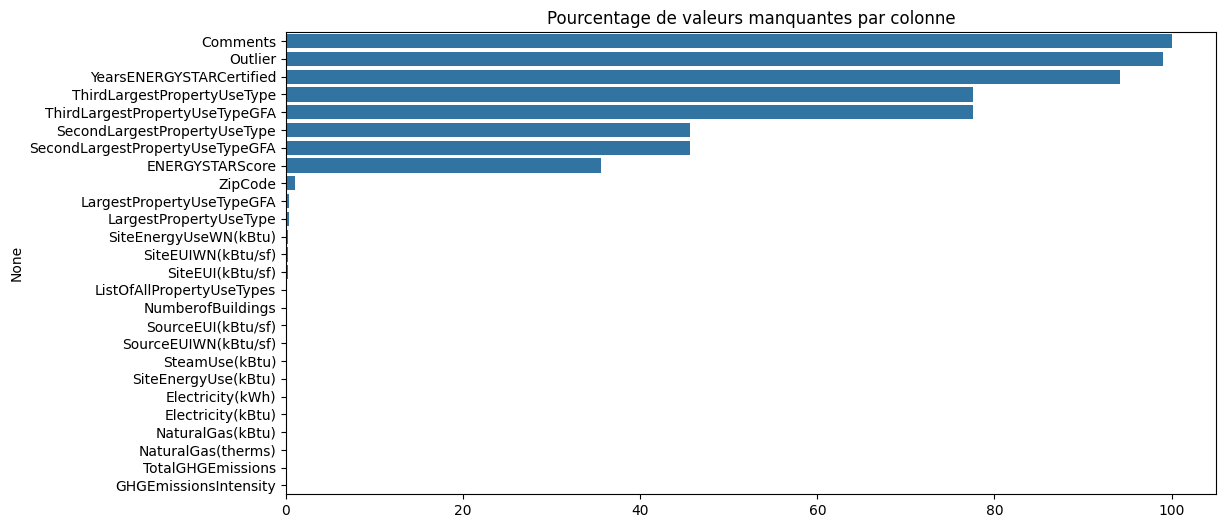

In [120]:
missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_pct.values, y=missing_pct.index)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.show()


2.6 — Diagnostic final et colonnes candidates à suppression

### 🧹 Colonnes candidates à suppression

- `Comments` : 100% vide → inutile
- `Outlier` : > 99% NA → non exploitable  
- `State` : toujours "WA"
- `City` : toujours "Seattle"
- `TaxParcelIdentificationNumber` : identifiant administratif → non pertinent pour le modèle
- Colonnes dupliquées en unité (Electricity(kWh)/Electricity(kBtu), Gas(kBtu)/Gas(therms))
- `PropertyName`, `Address` → identifiants uniques, inutilisables en ML

Ces colonnes seront supprimées à l'étape de préparation des données.


2.7 — Synthèse EDA

### 📊 Synthèse de l’EDA

- La variable cible `SiteEUI(kBtu/sf)` est très skewed, nécessite une transformation log ou un modèle robuste.
- Certaines surfaces (`PropertyGFATotal`) sont extrêmes → outliers à filtrer.
- Plusieurs colonnes présentent plus de 90% de valeurs manquantes.
- Les types de propriétés influencent fortement l’EUI.
- La majorité des corrélations fortes concernent les variables énergétiques brutes.
- Distribution de l’âge des bâtiments très large (1900 → 2015), influence probable.
- Ensemble propre mais nécessite :
  - filtrage des valeurs incohérentes  
  - suppression de colonnes inutiles  
  - imputations raisonnées  
  - feature engineering


PHASE 3 — NETTOYAGE & PRÉPARATION DU JEU DE DONNÉES

Objectifs :

supprimer les colonnes inutiles

filtrer les valeurs aberrantes

gérer les valeurs manquantes

préparer un dataset propre pour la modélisation

tracer les opérations (important pour OC

Basé sur EDA + les bonnes pratiques 

In [121]:
cols_to_drop = [
    "Comments",
    "Outlier",
    "State",          # toujours WA
    "City",           # toujours Seattle
    "TaxParcelIdentificationNumber",
    "PropertyName",
    "Address",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    # autres colonnes identifiant unique :
    "OSEBuildingID"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Colonnes supprimées :", cols_to_drop)
print("Nouvelle shape :", df.shape)


Colonnes supprimées : ['Comments', 'Outlier', 'State', 'City', 'TaxParcelIdentificationNumber', 'PropertyName', 'Address', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OSEBuildingID']
Nouvelle shape : (1569, 36)


3.2 — Filtrage des valeurs aberrantes

1. Surface totale incohérente

In [122]:
n0 = len(df)
df = df[df["PropertyGFATotal"] > 0]
df = df[df["PropertyGFATotal"] < df["PropertyGFATotal"].quantile(0.99)]
print(f"Surface : {n0} → {len(df)} lignes")


Surface : 1569 → 1553 lignes


2. EUI incohérent

In [123]:
n0 = len(df)
df = df[df["SiteEUI(kBtu/sf)"] > 0]
df = df[df["SiteEUI(kBtu/sf)"] < df["SiteEUI(kBtu/sf)"].quantile(0.99)]
print(f"EUI filtré : {n0} → {len(df)} lignes")


EUI filtré : 1553 → 1534 lignes


3. Année de construction aberrante

In [124]:
n0 = len(df)
df = df[(df["YearBuilt"] >= 1900) & (df["YearBuilt"] <= 2016)]
print(f"YearBuilt filtré : {n0} → {len(df)} lignes")


YearBuilt filtré : 1534 → 1534 lignes


3.3 — GESTION DES VALEURS MANQUANTES

1. Colonnes énergétiques → remplacer NA par 0

In [125]:
energy_cols = [
    "Electricity(kWh)", "NaturalGas(therms)", "SteamUse(kBtu)",
    "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)"
]

for col in energy_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


2. Variables structurelles → imputation médiane

In [126]:
struct_cols = ["NumberofBuildings", "NumberofFloors", "PropertyGFAParking"]

for col in struct_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


3. Dernier contrôle NA

In [127]:
df.isna().sum().sort_values(ascending=False).head(10)


YearsENERGYSTARCertified           1452
ThirdLargestPropertyUseType        1196
ThirdLargestPropertyUseTypeGFA     1196
SecondLargestPropertyUseType        705
SecondLargestPropertyUseTypeGFA     705
ENERGYSTARScore                     540
ZipCode                              14
LargestPropertyUseTypeGFA             4
LargestPropertyUseType                4
SiteEUIWN(kBtu/sf)                    1
dtype: int64

3.4 — ENCODAGE DES VARIABLES CATÉGORIELLES

In [128]:
categorical_cols = df.select_dtypes(include=["object"]).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encodage terminé.")
print("Nouvelle shape :", df.shape)


Encodage terminé.
Nouvelle shape : (1534, 621)


3.5 — NORMALISATION DES VARIABLES

In [129]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("SiteEUI(kBtu/sf)")  # on ne normalise pas la cible

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Normalisation OK")


Normalisation OK


3.6 — Dataframe final pour la modélisation

In [130]:
df_clean = df.copy()
print("Dataset final prêt pour la modélisation :", df_clean.shape)


Dataset final prêt pour la modélisation : (1534, 621)


PHASE 3 — SYNTHÈSE

###  Synthèse Phase 3 — Nettoyage et Préparation

- Colonnes inutiles supprimées (identifiants uniques, champs vides).
- Filtrage des outliers sur :
  - `PropertyGFATotal`
  - `SiteEUI(kBtu/sf)`
  - `YearBuilt`
- Gestion intelligente des valeurs manquantes :
  - Énergie → NA = 0
  - Structure → médiane
- Encodage one-hot des variables catégorielles.
- Normalisation des variables numériques (hors cible).
- Dataset final prêt pour la modélisation supervisée.

Ce dataset propre sera utilisé pour l’entraînement des modèles en Phase 4.
